In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime
import re
from pyzipcode import ZipCodeDatabase
csv_file = 'national_parks.csv'
csv_clean = 'national_parks_clean.csv'
csv_zip_code_data = 'dataclean1.csv'
csv_clean_zip = 'national_parks_clean_with_zip.csv'
csv_NP_population_zipcode = 'csv_NP_population_zipcode.csv'

In [2]:
park_df = pd.read_csv(csv_clean_zip, index_col = 0)

In [3]:
park_df

,Name,Location,coordinates,lat,lon,Date established as park,"Area, acres","area, acres","area, km^2",Recreation visitors,Description,national park full name,State,Park Designation,Park Code,postalCode
0,Acadia,Maine,44.35°N 68.21°W,44.3500,-68.2100,26-Feb-19,"49,076.63 acres (198.6 km2)","49,076.63",198.6,"3,537,575",Covering most of Mount Desert Island and other...,Acadia National Park,ME,National Park,acad,4609
1,Arches,Utah,38.68°N 109.57°W,38.6800,-109.5700,12-Nov-71,"76,678.98 acres (310.3 km2)","76,678.98",310.3,"1,663,557","This site features more than 2,000 natural san...",Arches National Park,UT,National Park,arch,84532
2,Badlands,South Dakota,43.75°N 102.50°W,43.7500,-102.5000,10-Nov-78,"242,755.94 acres (982.4 km2)","242,755.94",982.4,"1,008,942","The Badlands are a collection of buttes, pinna...",Badlands National Park,SD,National Park,badl,57750
3,Big Bend,Texas,29.25°N 103.25°W,29.2500,-103.2500,12-Jun-44,"801,163.21 acres (3,242.2 km2)","801,163.21","3,242.20","440,091",Named for the prominent bend in the Rio Grande...,Big Bend National Park,TX,National Park,bibe,79834
4,Biscayne,Florida,25.65°N 80.08°W,25.6500,-80.0800,28-Jun-80,"172,971.11 acres (700.0 km2)","172,971.11",700,"469,253","Located in Biscayne Bay, this park at the nort...",Biscayne National Park,FL,National Park,bisc,33033
5,Black Canyon of The Gunnison,Colorado,38.57°N 107.72°W,38.5700,-107.7200,21-Oct-99,"30,779.83 acres (124.6 km2)","30,779.83",124.6,"308,962",The park protects a quarter of the Gunnison Ri...,Black Canyon Of The Gunnison National Park,CO,National Park,blca,81401
6,Bryce Canyon,Utah,37.57°N 112.18°W,37.5700,-112.1800,25-Feb-28,"35,835.08 acres (145.0 km2)","35,835.08",145,"2,679,478",Bryce Canyon is a geological amphitheater on t...,Bryce Canyon National Park,UT,National Park,brca,84764
7,Canyonlands,Utah,38.2°N 109.93°W,38.2000,-109.9300,12-Sep-64,"337,597.83 acres (1,366.2 km2)","337,597.83","1,366.20","739,449",This landscape was eroded into a maze of canyo...,Canyonlands National Park,UT,National Park,cany,84532
8,Capitol Reef,Utah,38.20°N 111.17°W,38.2000,-111.1700,18-Dec-71,"241,904.50 acres (979.0 km2)","241,904.50",979,"1,227,627",The park's Waterpocket Fold is a 100-mile (160...,Capitol Reef National Park,UT,National Park,care,84775
9,Carlsbad Caverns,New Mexico,32.17°N 104.44°W,32.1700,-104.4400,14-May-30,"46,766.45 acres (189.3 km2)","46,766.45",189.3,"465,912","Carlsbad Caverns has 117 caves, the longest of...",Carlsbad Caverns National Park,NM,National Park,cave,88220


In [4]:
park_zip_code_population = park_df

In [5]:
park_zip_code_population['list of postal codes'] = ""

In [6]:
park_zip_code_population['list of postal codes'].astype(object)

0     
1     
2     
3     
4     
5     
6     
7     
8     
9     
10    
11    
12    
13    
14    
15    
16    
17    
18    
19    
20    
21    
22    
23    
24    
25    
26    
27    
28    
29    
30    
31    
32    
33    
34    
35    
36    
37    
38    
39    
40    
41    
42    
43    
44    
45    
46    
47    
48    
49    
50    
51    
52    
53    
54    
55    
56    
57    
58    
59    
Name: list of postal codes, dtype: object

In [7]:
park_zip_code_population

,Name,Location,coordinates,lat,lon,Date established as park,"Area, acres","area, acres","area, km^2",Recreation visitors,Description,national park full name,State,Park Designation,Park Code,postalCode,list of postal codes
0,Acadia,Maine,44.35°N 68.21°W,44.3500,-68.2100,26-Feb-19,"49,076.63 acres (198.6 km2)","49,076.63",198.6,"3,537,575",Covering most of Mount Desert Island and other...,Acadia National Park,ME,National Park,acad,4609,
1,Arches,Utah,38.68°N 109.57°W,38.6800,-109.5700,12-Nov-71,"76,678.98 acres (310.3 km2)","76,678.98",310.3,"1,663,557","This site features more than 2,000 natural san...",Arches National Park,UT,National Park,arch,84532,
2,Badlands,South Dakota,43.75°N 102.50°W,43.7500,-102.5000,10-Nov-78,"242,755.94 acres (982.4 km2)","242,755.94",982.4,"1,008,942","The Badlands are a collection of buttes, pinna...",Badlands National Park,SD,National Park,badl,57750,
3,Big Bend,Texas,29.25°N 103.25°W,29.2500,-103.2500,12-Jun-44,"801,163.21 acres (3,242.2 km2)","801,163.21","3,242.20","440,091",Named for the prominent bend in the Rio Grande...,Big Bend National Park,TX,National Park,bibe,79834,
4,Biscayne,Florida,25.65°N 80.08°W,25.6500,-80.0800,28-Jun-80,"172,971.11 acres (700.0 km2)","172,971.11",700,"469,253","Located in Biscayne Bay, this park at the nort...",Biscayne National Park,FL,National Park,bisc,33033,
5,Black Canyon of The Gunnison,Colorado,38.57°N 107.72°W,38.5700,-107.7200,21-Oct-99,"30,779.83 acres (124.6 km2)","30,779.83",124.6,"308,962",The park protects a quarter of the Gunnison Ri...,Black Canyon Of The Gunnison National Park,CO,National Park,blca,81401,
6,Bryce Canyon,Utah,37.57°N 112.18°W,37.5700,-112.1800,25-Feb-28,"35,835.08 acres (145.0 km2)","35,835.08",145,"2,679,478",Bryce Canyon is a geological amphitheater on t...,Bryce Canyon National Park,UT,National Park,brca,84764,
7,Canyonlands,Utah,38.2°N 109.93°W,38.2000,-109.9300,12-Sep-64,"337,597.83 acres (1,366.2 km2)","337,597.83","1,366.20","739,449",This landscape was eroded into a maze of canyo...,Canyonlands National Park,UT,National Park,cany,84532,
8,Capitol Reef,Utah,38.20°N 111.17°W,38.2000,-111.1700,18-Dec-71,"241,904.50 acres (979.0 km2)","241,904.50",979,"1,227,627",The park's Waterpocket Fold is a 100-mile (160...,Capitol Reef National Park,UT,National Park,care,84775,
9,Carlsbad Caverns,New Mexico,32.17°N 104.44°W,32.1700,-104.4400,14-May-30,"46,766.45 acres (189.3 km2)","46,766.45",189.3,"465,912","Carlsbad Caverns has 117 caves, the longest of...",Carlsbad Caverns National Park,NM,National Park,cave,88220,


In [8]:
zcdb = ZipCodeDatabase()
in_radius = [z.zip for z in zcdb.get_zipcodes_around_radius('44141', 60)] # ('ZIP', radius in miles)

In [9]:
in_radius

['43005',
 '43006',
 '43014',
 '43022',
 '43028',
 '43037',
 '43048',
 '43050',
 '43058',
 '43071',
 '43080',
 '43093',
 '43098',
 '43628',
 '43749',
 '43802',
 '43803',
 '43804',
 '43805',
 '43811',
 '43812',
 '43821',
 '43822',
 '43824',
 '43828',
 '43832',
 '43836',
 '43837',
 '43840',
 '43842',
 '43843',
 '43844',
 '43845',
 '43901',
 '43903',
 '43905',
 '43907',
 '43908',
 '43910',
 '43916',
 '43917',
 '43925',
 '43927',
 '43930',
 '43937',
 '43939',
 '43941',
 '43944',
 '43945',
 '43948',
 '43950',
 '43951',
 '43962',
 '43966',
 '43970',
 '43972',
 '43973',
 '43974',
 '43976',
 '43977',
 '43981',
 '43983',
 '43984',
 '43986',
 '43988',
 '43989',
 '44001',
 '44004',
 '44005',
 '44010',
 '44011',
 '44012',
 '44017',
 '44021',
 '44022',
 '44023',
 '44024',
 '44026',
 '44028',
 '44033',
 '44035',
 '44036',
 '44039',
 '44040',
 '44041',
 '44044',
 '44045',
 '44046',
 '44049',
 '44050',
 '44052',
 '44053',
 '44054',
 '44055',
 '44056',
 '44057',
 '44060',
 '44061',
 '44062',
 '44064',


In [10]:
zip_code_pop_df = pd.read_csv(csv_zip_code_data, index_col = 0)

In [11]:
zip_code_pop_df.reset_index(inplace = True, drop = True)
zip_code_pop_df

,Zipcode,City,State,Latitude,Longitude,Total_POP,TMale,TMale21,TMale35,TMale65,TFemale21,TFemale35,TFemale65,TFemal
0,71937,Cove,AR,34.398483,-94.39398,1988,1014,0,56,19,0,49,61,974
1,72044,Edgemont,AR,35.624351,-92.16056,670,282,10,0,8,0,0,21,388
2,56171,Sherburn,MN,43.660847,-94.74357,1792,880,9,40,32,6,23,15,912
3,52585,Richland,IA,41.194129,-91.98027,1018,500,0,35,11,0,42,10,518
4,47520,Cannelton,IN,37.934311,-86.67821,2854,1430,12,68,57,26,51,89,1424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32898,31038,Hillsboro,GA,33.172786,-83.63554,566,321,0,15,0,0,0,5,245
32899,12874,Silver Bay,NY,43.685475,-73.50767,153,75,0,0,2,0,0,0,78
32900,15207,Pittsburgh,PA,40.399355,-79.93414,11324,5442,0,351,125,26,375,99,5882
32901,52647,Olds,IA,41.133346,-91.54559,210,112,2,10,1,2,14,1,98


In [13]:
for i in range(0,len(park_zip_code_population)):
    if len(str(park_zip_code_population.loc[i,'postalCode']))<5:
        print(i,park_zip_code_population.loc[i,'postalCode'])

0 4609


In [14]:
for i in range(0,len(park_zip_code_population)):
    park_zip_code_population.loc[i,'postalCode'] = (5 - len(str(park_zip_code_population.loc[i,'postalCode']))) * '0' + str(park_zip_code_population.loc[i,'postalCode'])
    park_zip_code_population.loc[i,'Recreation visitors'] = np.int32(park_zip_code_population.loc[i,'Recreation visitors'].replace(',',''))

In [15]:
for i in range(1,len(zip_code_pop_df)):
    zip_code_pop_df.loc[i,'Zipcode'] = (5 - len(str(zip_code_pop_df.loc[i,'Zipcode']))) * '0' + str(zip_code_pop_df.loc[i,'Zipcode'])

In [16]:
for park_zip_code in park_zip_code_population['postalCode']:
    total_pop = 0
    zcdb = ZipCodeDatabase()
    in_radius = [z.zip for z in zcdb.get_zipcodes_around_radius(park_zip_code, 60)] # ('ZIP', radius in miles)
    park_zip_code_population.at[park_zip_code_population.loc[ park_zip_code_population['postalCode'] == park_zip_code].index.values[0], 'list of postal codes'] = in_radius
    park_zip_code_population.loc[ park_zip_code_population['postalCode'] == park_zip_code, 'count_of_postCodes'] = len(in_radius)
    for zipcode in in_radius:
        print(zipcode)
        try:
            value = zip_code_pop_df.loc[zip_code_pop_df['Zipcode'] == zipcode, 'Total_POP'].values[0]
        except IndexError:
            value = 0
        total_pop = total_pop + value
    park_zip_code_population.loc[ park_zip_code_population['postalCode'] == park_zip_code, 'total population'] = total_pop
        

04065
04401
04402
04408
04410
04411
04412
04413
04414
04415
04416
04417
04418
04419
04420
04421
04422
04423
04427
04428
04429
04431
04435
04438
04444
04448
04449
04450
04451
04453
04454
04455
04456
04457
04459
04461
04463
04467
04468
04469
04472
04473
04474
04475
04476
04487
04488
04489
04490
04491
04492
04493
04495
04496
04600
04605
04606
04607
04609
04611
04612
04613
04614
04615
04616
04617
04622
04623
04624
04625
04627
04629
04634
04635
04637
04640
04642
04643
04644
04645
04646
04648
04649
04650
04653
04654
04655
04656
04658
04660
04662
04664
04665
04668
04669
04672
04673
04674
04675
04676
04677
04679
04680
04681
04683
04684
04685
04686
04690
04693
04694
04782
04840
04841
04842
04843
04846
04848
04849
04851
04853
04854
04856
04858
04863
04865
04915
04921
04932
04933
04951
04974
04981
81320
81324
81325
81327
81331
81335
81411
81422
81429
81521
81522
81523
81524
81525
84252
84511
84515
84520
84525
84530
84532
84533
84535
84540
57521
57537
57543
57547
57551
57552
57553
57560
57567
5757

44145
44146
44147
44149
44168
44177
44178
44179
44181
44184
44185
44186
44188
44189
44190
44191
44192
44193
44194
44195
44197
44198
44199
44201
44202
44203
44210
44211
44212
44214
44215
44216
44217
44221
44222
44223
44224
44230
44231
44232
44233
44234
44235
44236
44237
44238
44240
44241
44242
44243
44250
44251
44253
44254
44255
44256
44258
44260
44262
44264
44265
44266
44270
44272
44273
44274
44275
44276
44278
44280
44281
44282
44285
44286
44287
44288
44301
44302
44303
44304
44305
44306
44307
44308
44309
44310
44311
44312
44313
44314
44315
44316
44317
44319
44320
44321
44322
44325
44326
44328
44331
44333
44334
44372
44393
44396
44397
44398
44399
44401
44402
44406
44411
44412
44416
44422
44423
44427
44429
44430
44431
44432
44439
44440
44444
44446
44449
44450
44451
44460
44470
44481
44482
44483
44484
44485
44486
44487
44488
44490
44491
44493
44501
44513
44598
44599
44601
44606
44607
44608
44609
44610
44611
44612
44613
44614
44615
44617
44618
44619
44620
44621
44622
44624
44625
44626
4462

99841
99850
86001
86002
86003
86004
86011
86015
86016
86017
86018
86020
86022
86023
86036
86038
86040
86046
86052
86305
86312
86313
86320
86323
86324
86325
86326
86330
86331
86334
86335
86336
86339
86340
86341
86342
86344
86351
86366
86435
86551
86631
59758
59798
82190
82922
83001
83002
83011
83012
83013
83014
83025
83110
83111
83112
83113
83115
83118
83119
83120
83122
83126
83127
83128
83230
83239
83276
83285
83403
83420
83421
83422
83424
83428
83429
83433
83436
83438
83441
83443
83447
83449
83451
83452
83455
83460
84034
84714
84728
84753
89042
89043
89301
89311
89315
89318
89319
80813
80820
80860
80926
81023
81040
81055
81066
81069
81091
81101
81102
81120
81123
81124
81125
81126
81129
81131
81132
81133
81134
81135
81136
81138
81140
81141
81143
81144
81146
81148
81149
81151
81152
81153
81155
81201
81212
81215
81221
81222
81223
81226
81227
81232
81233
81236
81239
81240
81241
81242
81244
81246
81248
81252
81253
81290
87512
87513
87514
87515
87518
87519
87520
87524
87525
87529
87539
8755

92175
92176
92177
92178
92184
92186
92187
92190
92191
92192
92193
92194
92195
92196
92197
92198
92201
92202
92203
92210
92211
92220
92227
92230
92232
92233
92234
92235
92236
92239
92240
92241
92252
92253
92254
92255
92256
92257
92258
92260
92261
92262
92263
92264
92268
92270
92274
92275
92276
92277
92278
92281
92282
92284
92285
92286
92292
92304
92305
92309
92310
92314
92322
92323
92326
92327
92329
92332
92334
92338
92340
92350
92357
92365
92366
92369
92375
92378
92385
92386
92391
92393
92398
92403
92406
92412
92413
92414
92415
92416
92418
92420
92423
92424
92427
92502
92513
92514
92515
92516
92517
92519
92521
92522
92531
92536
92539
92546
92549
92552
92554
92556
92561
92564
92572
92581
92589
92593
92599
92877
92878
93558
93592
99579
99580
99613
99619
99625
99633
99636
99649
99670
99501
99502
99503
99504
99505
99506
99507
99508
99509
99510
99511
99512
99513
99514
99515
99516
99517
99518
99519
99520
99521
99522
99523
99524
99540
99572
99577
99587
99599
99605
99631
99664
93201
93202
9320

98052
98053
98054
98055
98056
98057
98058
98059
98060
98061
98062
98063
98064
98065
98067
98068
98070
98071
98072
98073
98074
98075
98082
98083
98092
98093
98101
98102
98103
98104
98105
98106
98107
98108
98109
98110
98111
98112
98113
98114
98115
98116
98117
98118
98119
98121
98122
98124
98125
98126
98129
98130
98131
98132
98133
98134
98136
98138
98140
98144
98145
98146
98148
98150
98151
98154
98155
98158
98160
98161
98164
98166
98168
98171
98174
98177
98178
98181
98184
98185
98188
98190
98191
98195
98198
98199
98201
98203
98204
98205
98206
98207
98208
98220
98221
98222
98223
98224
98225
98226
98227
98228
98229
98230
98231
98232
98233
98235
98236
98237
98238
98239
98240
98241
98243
98244
98245
98246
98247
98248
98249
98251
98252
98253
98255
98256
98257
98258
98259
98260
98261
98262
98263
98264
98266
98267
98270
98271
98272
98273
98274
98275
98276
98277
98278
98279
98280
98282
98283
98284
98286
98287
98288
98290
98291
98292
98293
98294
98295
98296
98297
98310
98311
98312
98314
98315
9831

22935
22936
22937
22938
22939
22940
22942
22943
22945
22946
22947
22948
22949
22952
22953
22954
22957
22958
22959
22960
22963
22964
22965
22967
22968
22969
22971
22972
22973
22974
22976
22980
22987
22989
23004
23014
23015
23022
23024
23027
23038
23039
23040
23054
23055
23063
23065
23067
23084
23093
23101
23102
23103
23113
23117
23123
23129
23139
23146
23153
23160
23170
23192
23233
23238
23921
23936
24401
24402
24407
24411
24415
24421
24431
24435
24437
24440
24441
24459
24463
24464
24467
24469
24471
24472
24475
24476
24477
24479
24482
24483
24486
24521
24533
24536
24553
24562
24572
24574
24581
24590
24595
24599
25401
25402
25410
25411
25413
25414
25419
25420
25421
25422
25423
25425
25427
25428
25429
25430
25431
25432
25434
25437
25438
25440
25441
25442
25443
25444
25446
25543
26704
26710
26711
26714
26717
26719
26722
26726
26731
26734
26739
26743
26750
26753
26755
26757
26761
26763
26767
26801
26802
26808
26810
26812
26817
26818
26823
26824
26833
26836
26838
26845
26847
26851
26852
2685

In [17]:
park_zip_code_population.to_csv(csv_NP_population_zipcode)

In [18]:
park_zip_code_population.astype({'Recreation visitors': 'int32'}).dtypes

Name                         object
Location                     object
coordinates                  object
lat                         float64
lon                         float64
Date established as park     object
Area, acres                  object
area, acres                  object
area, km^2                   object
Recreation visitors           int32
Description                  object
national park full name      object
State                        object
Park Designation             object
Park Code                    object
postalCode                   object
list of postal codes         object
count_of_postCodes          float64
total population            float64
dtype: object

In [19]:
park_zip_code_population

,Name,Location,coordinates,lat,lon,Date established as park,"Area, acres","area, acres","area, km^2",Recreation visitors,Description,national park full name,State,Park Designation,Park Code,postalCode,list of postal codes,count_of_postCodes,total population
0,Acadia,Maine,44.35°N 68.21°W,44.3500,-68.2100,26-Feb-19,"49,076.63 acres (198.6 km2)","49,076.63",198.6,3537575,Covering most of Mount Desert Island and other...,Acadia National Park,ME,National Park,acad,04609,"[04065, 04401, 04402, 04408, 04410, 04411, 044...",133.0,254337.0
1,Arches,Utah,38.68°N 109.57°W,38.6800,-109.5700,12-Nov-71,"76,678.98 acres (310.3 km2)","76,678.98",310.3,1663557,"This site features more than 2,000 natural san...",Arches National Park,UT,National Park,arch,84532,"[81320, 81324, 81325, 81327, 81331, 81335, 814...",24.0,43879.0
2,Badlands,South Dakota,43.75°N 102.50°W,43.7500,-102.5000,10-Nov-78,"242,755.94 acres (982.4 km2)","242,755.94",982.4,1008942,"The Badlands are a collection of buttes, pinna...",Badlands National Park,SD,National Park,badl,57750,"[57521, 57537, 57543, 57547, 57551, 57552, 575...",43.0,34304.0
3,Big Bend,Texas,29.25°N 103.25°W,29.2500,-103.2500,12-Jun-44,"801,163.21 acres (3,242.2 km2)","801,163.21","3,242.20",440091,Named for the prominent bend in the Rio Grande...,Big Bend National Park,TX,National Park,bibe,79834,"[79830, 79831, 79832, 79834, 79842, 79848, 798...",8.0,10018.0
4,Biscayne,Florida,25.65°N 80.08°W,25.6500,-80.0800,28-Jun-80,"172,971.11 acres (700.0 km2)","172,971.11",700,469253,"Located in Biscayne Bay, this park at the nort...",Biscayne National Park,FL,National Park,bisc,33033,"[33001, 33002, 33003, 33004, 33008, 33009, 330...",285.0,5634519.0
5,Black Canyon of The Gunnison,Colorado,38.57°N 107.72°W,38.5700,-107.7200,21-Oct-99,"30,779.83 acres (124.6 km2)","30,779.83",124.6,308962,The park protects a quarter of the Gunnison Ri...,Black Canyon Of The Gunnison National Park,CO,National Park,blca,81401,"[81122, 81127, 81147, 81157, 81220, 81235, 812...",66.0,354456.0
6,Bryce Canyon,Utah,37.57°N 112.18°W,37.5700,-112.1800,25-Feb-28,"35,835.08 acres (145.0 km2)","35,835.08",145,2679478,Bryce Canyon is a geological amphitheater on t...,Bryce Canyon National Park,UT,National Park,brca,84764,"[84637, 84657, 84701, 84710, 84711, 84712, 847...",50.0,65540.0
7,Canyonlands,Utah,38.2°N 109.93°W,38.2000,-109.9300,12-Sep-64,"337,597.83 acres (1,366.2 km2)","337,597.83","1,366.20",739449,This landscape was eroded into a maze of canyo...,Canyonlands National Park,UT,National Park,cany,84532,,24.0,43879.0
8,Capitol Reef,Utah,38.20°N 111.17°W,38.2000,-111.1700,18-Dec-71,"241,904.50 acres (979.0 km2)","241,904.50",979,1227627,The park's Waterpocket Fold is a 100-mile (160...,Capitol Reef National Park,UT,National Park,care,84775,"[84252, 84513, 84516, 84518, 84521, 84522, 845...",34.0,44126.0
9,Carlsbad Caverns,New Mexico,32.17°N 104.44°W,32.1700,-104.4400,14-May-30,"46,766.45 acres (189.3 km2)","46,766.45",189.3,465912,"Carlsbad Caverns has 117 caves, the longest of...",Carlsbad Caverns National Park,NM,National Park,cave,88220,"[79754, 79770, 79772, 79785, 79786, 79841, 882...",30.0,153563.0


In [20]:
park_zip_code_population.sort_values(by = 'total population', inplace = True, ascending = False)

In [21]:
park_zip_code_recreation = park_zip_code_population.sort_values(by = 'Recreation visitors', ascending = False)

In [22]:
park_zip_code_population['Name+Location'] = park_zip_code_population['Name'] + '\n'  + park_zip_code_population['Location'] 

In [ ]:
park_zip_code_recreation['Name+Location'] = park_zip_code_population['Name'] + '\n'  + park_zip_code_population['Location'] 

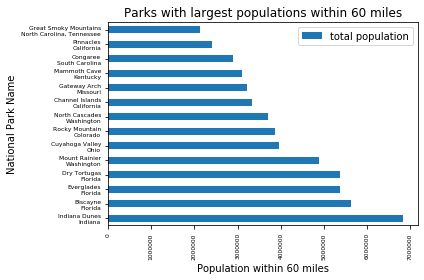

In [23]:
ax1 = park_zip_code_population[0:14].plot(x = 'Name+Location', y = 'total population' , kind = 'barh', title = 'Parks with largest populations within 60 miles', fontsize = 6)
plt.xticks(rotation = 90)
ax1.set_xlabel('Population within 60 miles')
ax1.set_ylabel('National Park Name')
plt.savefig('./data_summary/parks_with_largest_populations.png', bbox_inches='tight')
plt.tight_layout()

In [24]:
ax1 = park_zip_code_recreation[0:14].plot(x = 'Name+Location', y = 'Recreation visitors' , kind = 'barh', title = 'Parks with most visitors (2019)', fontsize = 6)
plt.xticks(rotation = 90)
ax1.set_xlabel('# of park visitors')
ax1.set_ylabel('National Park Name')
plt.savefig('./data_summary/parks_with_most_visitors.png', bbox_inches='tight')
plt.tight_layout()

KeyError: 'Name+Location'

In [28]:
ax1 = park_zip_code_recreation[-15:-1].plot(x = 'Name+Location', y = 'Recreation visitors' , kind = 'barh', title = 'Parks with fewest visitors (2019)', fontsize = 6)
plt.xticks(rotation = 90)
ax1.set_xlabel('# of park visitors')
ax1.set_ylabel('National Park Name')
plt.savefig('./data_summary/parks_with_least_visitors.png', bbox_inches='tight')
plt.tight_layout()

KeyError: 'Name+Location'

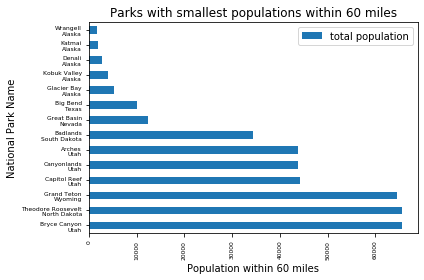

In [26]:
ax1 = park_zip_code_population[-15:-1].plot(x = 'Name+Location', y = 'total population' , kind = 'barh', title = 'Parks with smallest populations within 60 miles', fontsize = 6)
plt.xticks(rotation = 90)
ax1.set_xlabel('Population within 60 miles')
ax1.set_ylabel('National Park Name')
plt.savefig('./data_summary/parks_with_smallest_populations.png', bbox_inches='tight')
plt.tight_layout()

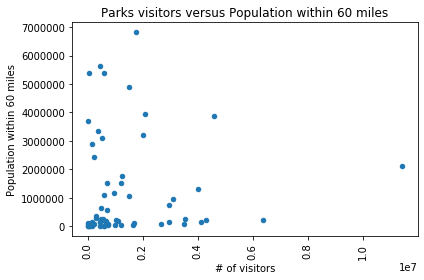

In [27]:
ax1 = park_zip_code_population.plot(x = 'Recreation visitors', y = 'total population' , kind = 'scatter', title = 'Parks visitors versus Population within 60 miles')
plt.xticks(rotation = 90)
ax1.set_xlabel('# of visitors')
ax1.set_ylabel('Population within 60 miles')
plt.savefig('./data_summary/parks_visitors_versus_population.png', bbox_inches='tight')
plt.tight_layout()